In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

In [2]:
np.random.seed(123456789)

 - https://en.wikipedia.org/wiki/Monte_Carlo_method
 - https://docs.scipy.org/doc/scipy/reference/stats.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform
 - http://mathfaculty.fullerton.edu/mathews/n2003/montecarlopimod.html

In [3]:
def genSample(n=100, law=stats.uniform):
    rv = law()
    df = pd.DataFrame(columns=['x', 'y'])
    df.x = rv.rvs(n)
    df.y = rv.rvs(n)
    df['d'] = np.sqrt(df.x**2 + df.y**2)
    df['k'] = df.d <= 1
    df = df.set_index('k').sort_index()
    return df

In [4]:
def estimate(df):
    A = df.iloc[:,0].groupby(df.index).count()/df.shape[0]
    return 4*A.loc[True]

In [5]:
def plot(df):
    fig, axe = plt.subplots()
    axe.plot(df.loc[False,:].x, df.loc[False,:].y, '.r', markersize=1, label='outside')
    axe.plot(df.loc[True,:].x, df.loc[True,:].y, '.b', markersize=1, label='inside')
    t = np.linspace(0, np.pi/2, 100)
    axe.plot(np.cos(t), np.sin(t), linewidth=2, label='constraint')
    axe.set_title(r'Monte-Carlo: $n=%.1e$ $\pi \simeq %.5f$' % (df.shape[0], estimate(df)))
    axe.set_xlabel(r"$x$")
    axe.set_ylabel(r"$y$")
    axe.grid()
    axe.legend(bbox_to_anchor=(1,1), loc='upper left')
    axe.set_aspect('equal')
    return fig

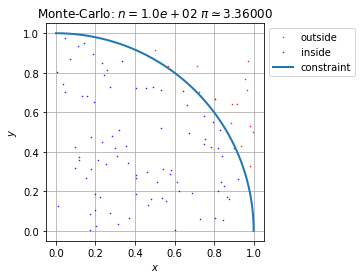

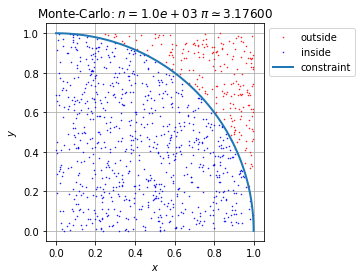

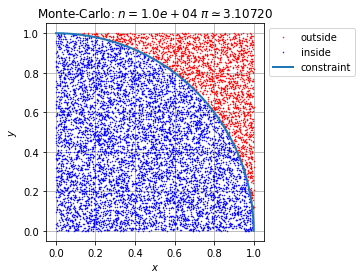

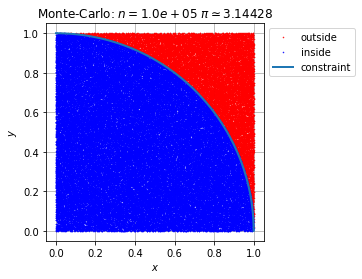

In [6]:
for n in 10**(np.arange(4)+2):
    s = genSample(n=n)
    plot(s)

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

np.random.seed(12345)

N = 10000
x = np.random.uniform(0, 1, N) 
y = np.random.uniform(0, 1, N) 

In [8]:
d = x**2 + y**2
q = (d <= 1)

In [9]:
pi = 4*q.sum()/q.size # A = 
pi

3.1136

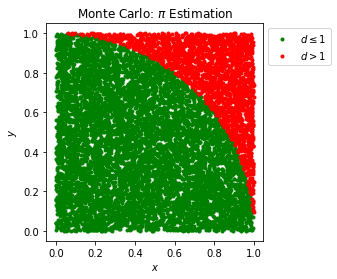

In [10]:
fig, axe = plt.subplots()
axe.plot(x[q], y[q], '.', color='green', label=r'$d \leq 1$')
axe.plot(x[~q], y[~q], '.', color='red', label=r'$d > 1$')
axe.set_aspect('equal')
axe.set_title(r'Monte Carlo: $\pi$ Estimation')
axe.set_xlabel('$x$')
axe.set_ylabel('$y$')
axe.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig.savefig('MonteCarlo.png', dpi=120)